Iteration  200 | Cost: 19.0872
Iteration  400 | Cost: 17.1266
Iteration  600 | Cost: 15.7663
Iteration  800 | Cost: 14.8223
Iteration 1000 | Cost: 14.1672
Iteration 1200 | Cost: 13.7126
Iteration 1400 | Cost: 13.3970
Iteration 1600 | Cost: 13.1779
Iteration 1800 | Cost: 13.0257
Iteration 2000 | Cost: 12.9199
Iteration 2200 | Cost: 12.8464
Iteration 2400 | Cost: 12.7952
Iteration 2600 | Cost: 12.7595
Iteration 2800 | Cost: 12.7345
Iteration 3000 | Cost: 12.7170
Iteration 3200 | Cost: 12.7047
Iteration 3400 | Cost: 12.6960
Iteration 3600 | Cost: 12.6898
Iteration 3800 | Cost: 12.6853
Iteration 4000 | Cost: 12.6820
Iteration 4200 | Cost: 12.6795
Iteration 4400 | Cost: 12.6777
Iteration 4600 | Cost: 12.6762
Iteration 4800 | Cost: 12.6750
Iteration 5000 | Cost: 12.6740
Iteration 5200 | Cost: 12.6731
Iteration 5400 | Cost: 12.6723
Iteration 5600 | Cost: 12.6716
Iteration 5800 | Cost: 12.6709
Iteration 6000 | Cost: 12.6703
Iteration 6200 | Cost: 12.6697
Iteration 6400 | Cost: 12.6691
Iteratio

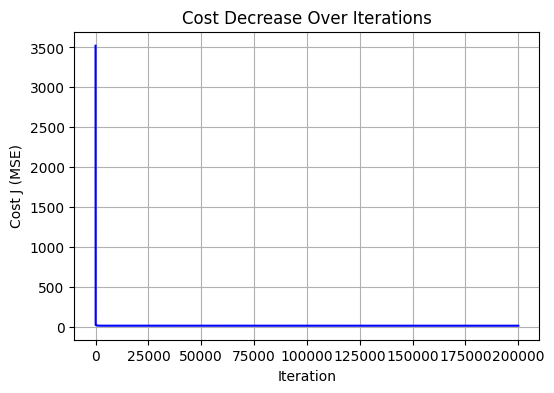


--- Comparison with scikit-learn ---
sklearn intercept_:  [5.40631681]
sklearn coef_:       [[1.48124555 2.49604799]]


In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# -------------------------------------------------
# 1) Generate Synthetic Data for Multiple Features
# -------------------------------------------------
np.random.seed(42)  # for reproducibility

m = 10000  # number of samples
# Let's create 2 features (x1, x2) plus an intercept

# Feature 1: random values in [0, 10]
x1 = np.random.rand(m) * 10  

# Feature 2: random values in [50, 100]
x2 = 50 + np.random.rand(m) * 50 

# True parameters for our synthetic linear function
# y = theta0 + theta1*x1 + theta2*x2 + noise
theta0_true = 5.0
theta1_true = 1.5
theta2_true = 2.5

# Create some random noise (mean=0, std=5)
noise = np.random.normal(0, 5, m)

# Generate the target y
y = theta0_true + (theta1_true * x1) + (theta2_true * x2) + noise

# Reshape x1, x2, y to be column vectors (optional but cleaner for concatenation)
x1 = x1.reshape(-1, 1)  # shape (100, 1)
x2 = x2.reshape(-1, 1)  # shape (100, 1)
y = y.reshape(-1, 1)    # shape (100, 1)

# -------------------------------------------------
# 2) Build Feature Matrix X (with Intercept Column)
# -------------------------------------------------
# We want X to be shape (m, n+1). Here n=2 features, so n+1=3 columns.
# Column 0: all ones (for intercept)
# Column 1: x1
# Column 2: x2
ones = np.ones((m, 1))  # shape (100, 1)
X = np.hstack((ones, x1, x2))  # shape (100, 3)

# -------------------------------------------------
# 3) Define the Cost Function (Vectorized MSE)
# -------------------------------------------------
def compute_cost(X, y, theta):
    """
    X: shape (m, n+1)
    y: shape (m, 1)
    theta: shape (n+1, 1)
    Returns the scalar cost J.
    """
    m = len(y)
    predictions = X.dot(theta)       # shape (m, 1)
    errors = predictions - y         # shape (m, 1)
    cost = (1 / (2*m)) * np.sum(errors ** 2)
    return cost

# -------------------------------------------------
# 4) Gradient Descent Step (Vectorized)
# -------------------------------------------------
def gradient_descent_step(X, y, theta, alpha):
    """
    Performs a single gradient descent update (vectorized).
    X: (m, n+1)
    y: (m, 1)
    theta: (n+1, 1)
    alpha: learning rate
    Returns updated theta.
    """
    m = len(y)
    
    # Predictions and error
    predictions = X.dot(theta)   # shape (m, 1)
    errors = predictions - y     # shape (m, 1)
    
    # Gradient: (1/m) * X^T * (errors)
    # X^T: shape (n+1, m), errors: shape (m, 1) => result shape (n+1, 1)
    gradient = (1/m) * X.T.dot(errors)
    
    # Update rule
    theta = theta - alpha * gradient
    
    return theta

# -------------------------------------------------
# 5) Training Loop
# -------------------------------------------------
# Let's pick a learning rate and number of iterations
alpha = 0.0001
iterations = 200000

# Initialize theta to zeros (or small random)
n = X.shape[1]  # number of features + 1
theta = np.zeros((n, 1))  # shape (3, 1)

cost_history = []

for i in range(iterations):
    # Perform a gradient descent step
    theta = gradient_descent_step(X, y, theta, alpha)
    
    # Compute the current cost
    current_cost = compute_cost(X, y, theta)
    cost_history.append(current_cost)
    
    # (Optional) print progress every 200 iterations
    if (i+1) % 200 == 0:
        print(f"Iteration {i+1:4d} | Cost: {current_cost:.4f}")

# Print final parameters and cost
print("\nFinal theta (parameters):")
print(theta)
final_cost = compute_cost(X, y, theta)
print(f"Final cost: {final_cost:.4f}")

# -------------------------------------------------
# 6) Plot Cost Over Iterations
# -------------------------------------------------
plt.figure(figsize=(6, 4))
plt.plot(range(1, iterations+1), cost_history, 'b-')
plt.xlabel("Iteration")
plt.ylabel("Cost J (MSE)")
plt.title("Cost Decrease Over Iterations")
plt.grid(True)
plt.show()

# -------------------------------------------------
# 7) Optional: Compare with scikit-learn
# -------------------------------------------------
# We'll fit a LinearRegression model to see if we get similar results
model = LinearRegression()
# For sklearn, we do NOT include the column of ones in X. It adds intercept by itself.
X_sklearn = np.hstack((x1, x2))  # Just the actual features, shape (m, 2)
model.fit(X_sklearn, y)

print("\n--- Comparison with scikit-learn ---")
print("sklearn intercept_: ", model.intercept_)
print("sklearn coef_:      ", model.coef_)
